In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_ds="/kaggle/input/birds-20-species-image-classification/train"
test_ds="/kaggle/input/birds-20-species-image-classification/test"
validation_ds="/kaggle/input/birds-20-species-image-classification/valid"

In [3]:
os.listdir('/kaggle/input/birds-20-species-image-classification/train')

['AMERICAN KESTREL',
 'AMERICAN GOLDFINCH',
 'AFRICAN PYGMY GOOSE',
 'ABYSSINIAN GROUND HORNBILL',
 'ALBERTS TOWHEE',
 'AFRICAN EMERALD CUCKOO',
 'ALBATROSS',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'ABBOTTS BABBLER',
 'AFRICAN FIREFINCH',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'AMERICAN FLAMINGO',
 'AMERICAN AVOCET',
 'ALTAMIRA YELLOWTHROAT',
 'AFRICAN PIED HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN OYSTER CATCHER',
 'ABBOTTS BOOBY']

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 
                                 


valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator 

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')
validation_generator = valid_datagen.flow_from_directory(validation_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [6]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [7]:
img= train_generator[0]
print(img)

(array([[[[185.0525  , 197.11102 , 132.19586 ],
         [177.09714 , 190.479   , 121.337425],
         [175.01445 , 191.6475  , 113.24976 ],
         ...,
         [231.22247 , 205.22247 , 146.22247 ],
         [231.22247 , 205.22247 , 146.22247 ],
         [231.22247 , 205.22247 , 146.22247 ]],

        [[162.60474 , 177.18031 , 102.04376 ],
         [150.9057  , 168.31148 ,  88.26755 ],
         [163.60776 , 181.57025 ,  99.021   ],
         ...,
         [240.50117 , 214.50117 , 155.50117 ],
         [240.50117 , 214.50117 , 155.50117 ],
         [240.50117 , 214.50117 , 155.50117 ]],

        [[151.96852 , 168.29799 ,  83.70321 ],
         [139.44559 , 157.75241 ,  71.01336 ],
         [162.83694 , 180.46977 ,  98.740395],
         ...,
         [243.54826 , 218.      , 158.77412 ],
         [243.54826 , 218.      , 158.77412 ],
         [243.54826 , 218.      , 158.77412 ]],

        ...,

        [[ 98.12295 ,  93.12295 ,  62.372124],
         [ 92.167114,  87.521225,  54.45889 

In [8]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [9]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 20)


In [10]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

101
56
57


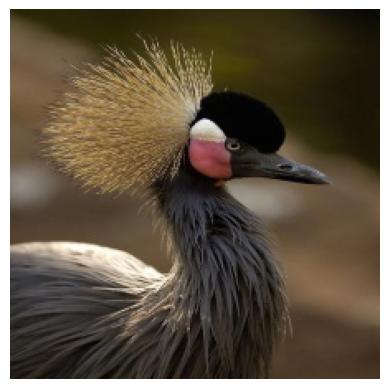

In [13]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/birds-20-species-image-classification/images to predict/5.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D



In [17]:
# VGG 19 Model
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(20, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [18]:
model = VGG19((224, 224, 3))

In [19]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                         

In [20]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [21]:
history =model.fit(train_generator, validation_data=validation_generator, epochs=45)

Epoch 1/45
101/101 [==============================] - 78s 671ms/step - loss: 2.9948 - accuracy: 0.0570 - val_loss: 2.9692 - val_accuracy: 0.0800
Epoch 2/45
101/101 [==============================] - 47s 463ms/step - loss: 2.8701 - accuracy: 0.0991 - val_loss: 2.6248 - val_accuracy: 0.1900
Epoch 3/45
101/101 [==============================] - 48s 469ms/step - loss: 2.7186 - accuracy: 0.1499 - val_loss: 2.6625 - val_accuracy: 0.2000
Epoch 4/45
101/101 [==============================] - 47s 462ms/step - loss: 2.6421 - accuracy: 0.1811 - val_loss: 2.2836 - val_accuracy: 0.2900
Epoch 5/45
101/101 [==============================] - 48s 477ms/step - loss: 2.5338 - accuracy: 0.1945 - val_loss: 2.2328 - val_accuracy: 0.2600
Epoch 6/45
101/101 [==============================] - 48s 470ms/step - loss: 2.3701 - accuracy: 0.2438 - val_loss: 2.0836 - val_accuracy: 0.3300
Epoch 7/45
101/101 [==============================] - 49s 479ms/step - loss: 2.2546 - accuracy: 0.2790 - val_loss: 1.9020 - val_ac

In [24]:
n_categories = len(os.listdir('/kaggle/input/birds-20-species-image-classification/train'))# number of categories print(n_categories)

In [25]:
n_categories

20

In [30]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,2.994806,0.057045,2.969185,0.08
1,2.870097,0.099127,2.624782,0.19
2,2.718551,0.149938,2.662476,0.20
3,2.642122,0.181110,2.283550,0.29
4,2.533769,0.194514,2.232793,0.26


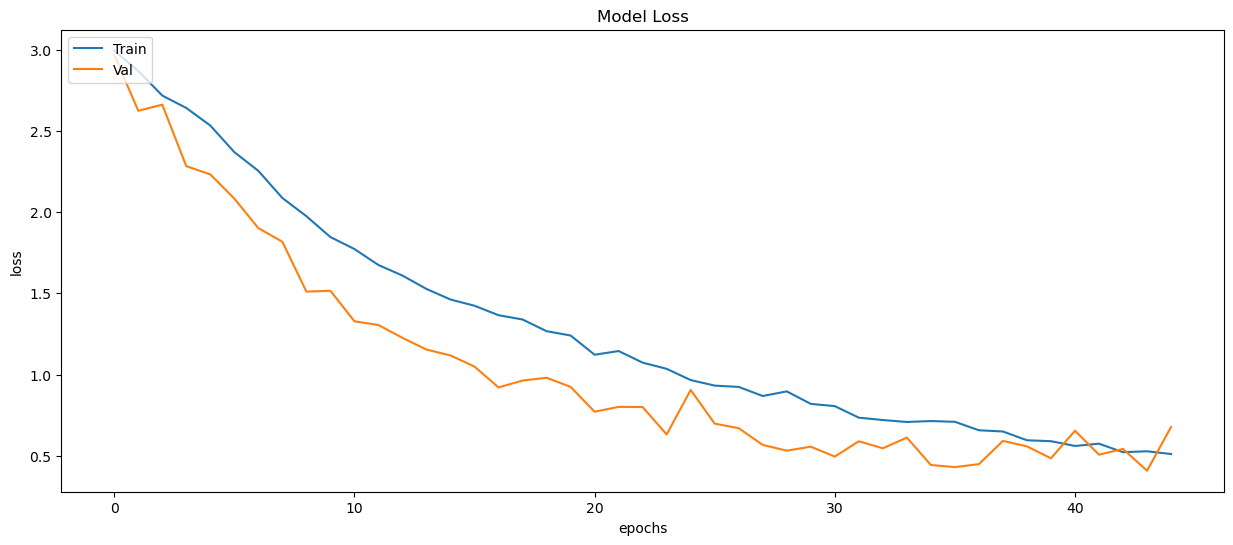

In [32]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

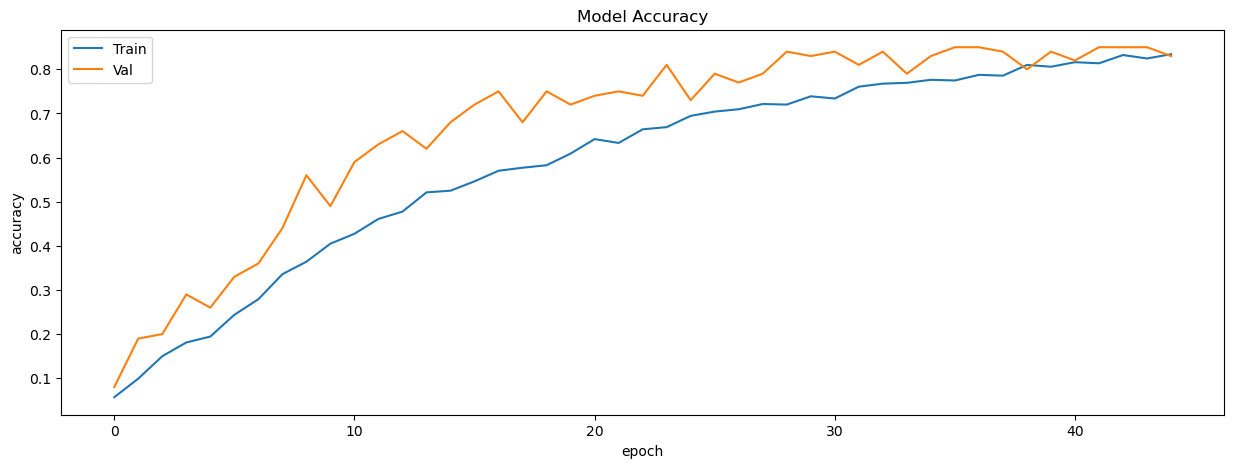

In [37]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [38]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 [==============================] - 1s 196ms/step


In [39]:
results =model.evaluate(test_generator)

4/4 [==============================] - 0s 63ms/step - loss: 0.4976 - accuracy: 0.8600


1/1 [==============================] - 0s 24ms/step


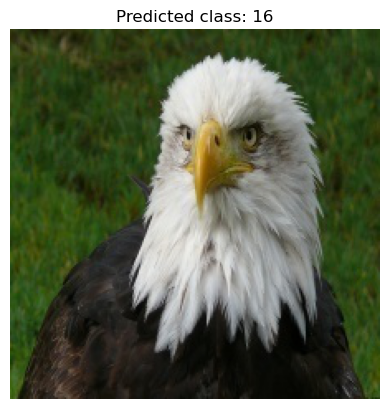

In [42]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/birds-20-species-image-classification/images to predict'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [45]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {test_ds[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : r
Class probability: 0.055224705
Predicted class for 2.jpg : r
Class probability: 0.05593458
Predicted class for 3.jpg : r
Class probability: 0.056043338
Predicted class for 4.jpg : r
Class probability: 0.055889327
Predicted class for 5.jpg : r
Class probability: 0.05578077
Predicted class for 6.jpg : r
Class probability: 0.056443598
